<a href="https://colab.research.google.com/github/dpyburn89/Pre_modeling/blob/main/Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Modeling - Week 4
## Lecture Examples

In [ ]:
%cd C:\Users\JamzM\OneDrive\Documents\Teaching\2022 Fall\Predictive Modeling

Handling Missing Values

You have the option to drop rows or columns that have missing values from your data
Impute Missing Values - fill in methods
  - Fill with a constant value, such as 0
  -Fill FORWARD or BACKWARD
  -Interpolate (this is good for sime series data)
  -Fill with descriptive statistics (mean, median, mode)
  -Fill with the nearest neighbor

You can add indicator variables to identify where the missing values were filled in/imputed. Do this when missing values are actually meaninful to your analysis. Python will add a column with an indicato (0 or 1) to track where imputed values were added

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Predictive Modeling/ChemicalManufacturingProcess.csv')
data.head()

,Yield,BiologicalMaterial01,BiologicalMaterial02,BiologicalMaterial03,BiologicalMaterial04,BiologicalMaterial05,BiologicalMaterial06,BiologicalMaterial07,BiologicalMaterial08,BiologicalMaterial09,...,ManufacturingProcess36,ManufacturingProcess37,ManufacturingProcess38,ManufacturingProcess39,ManufacturingProcess40,ManufacturingProcess41,ManufacturingProcess42,ManufacturingProcess43,ManufacturingProcess44,ManufacturingProcess45
0,38.00,6.25,49.58,56.97,12.74,19.51,43.73,100.0,16.66,11.44,...,0.019,0.5,3,7.2,NaN,NaN,11.6,3.0,1.8,2.4
1,42.44,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.019,2.0,2,7.2,0.1,0.15,11.1,0.9,1.9,2.2
2,42.03,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018,0.7,2,7.2,0.0,0.00,12.0,1.0,1.8,2.3
3,41.42,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018,1.2,2,7.2,0.0,0.00,10.6,1.1,1.8,2.1
4,42.49,7.47,63.33,72.25,14.02,17.91,54.66,100.0,18.22,12.80,...,0.017,0.2,2,7.3,0.0,0.00,11.0,1.1,1.7,2.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


"ChemicalManufacturingProcess {AppliedPredictiveModeling}	R Documentation


Chemical Manufacturing Process Data
Description

This data set contains information about a chemical manufacturing process, in which the goal is to understand the relationship between the process and the resulting final product yield. Raw material in this process is put through a sequence of 27 steps to generate the final pharmaceutical product. The starting material is generated from a biological unit and has a range of quality and characteristics. The objective in this project was to develop a model to predict percent yield of the manufacturing process. The data set consisted of 177 samples of biological material for which 57 characteristics were measured. Of the 57 characteristics, there were 12 measurements of the biological starting material, and 45 measurements of the manufacturing process. The process variables included measurements such as temperature, drying time, washing time, and concentrations of by–products at various steps. Some of the process measurements can be controlled, while others are observed. Predictors are continuous, count, categorical; some are correlated, and some contain missing values. Samples are not independent because sets of samples come from the same batch of biological starting material.

Value

ChemicalManufacturingProcess: a data frame with columns for the outcome (Yield) and the predictors (BiologicalMaterial01 though BiologicalMaterial12 and ManufacturingProcess01 though ManufacturingProcess45"

In [ ]:
data.shape

(176, 58)

In [ ]:
data.dtypes
# Looking at the types, we can see there are no categorical variables, only floats and ints

Yield                     float64
BiologicalMaterial01      float64
BiologicalMaterial02      float64
BiologicalMaterial03      float64
BiologicalMaterial04      float64
BiologicalMaterial05      float64
BiologicalMaterial06      float64
BiologicalMaterial07      float64
BiologicalMaterial08      float64
BiologicalMaterial09      float64
BiologicalMaterial10      float64
BiologicalMaterial11      float64
BiologicalMaterial12      float64
ManufacturingProcess01    float64
ManufacturingProcess02    float64
ManufacturingProcess03    float64
ManufacturingProcess04    float64
ManufacturingProcess05    float64
ManufacturingProcess06    float64
ManufacturingProcess07    float64
ManufacturingProcess08    float64
ManufacturingProcess09    float64
ManufacturingProcess10    float64
ManufacturingProcess11    float64
ManufacturingProcess12    float64
ManufacturingProcess13    float64
ManufacturingProcess14    float64
ManufacturingProcess15      int64
ManufacturingProcess16      int64
ManufacturingP

In [ ]:
data.isna().sum() # Calulate missing values per column, some have more missing values than others

Yield                      0
BiologicalMaterial01       0
BiologicalMaterial02       0
BiologicalMaterial03       0
BiologicalMaterial04       0
BiologicalMaterial05       0
BiologicalMaterial06       0
BiologicalMaterial07       0
BiologicalMaterial08       0
BiologicalMaterial09       0
BiologicalMaterial10       0
BiologicalMaterial11       0
BiologicalMaterial12       0
ManufacturingProcess01     1
ManufacturingProcess02     3
ManufacturingProcess03    15
ManufacturingProcess04     1
ManufacturingProcess05     1
ManufacturingProcess06     2
ManufacturingProcess07     1
ManufacturingProcess08     1
ManufacturingProcess09     0
ManufacturingProcess10     9
ManufacturingProcess11    10
ManufacturingProcess12     1
ManufacturingProcess13     0
ManufacturingProcess14     1
ManufacturingProcess15     0
ManufacturingProcess16     0
ManufacturingProcess17     0
ManufacturingProcess18     0
ManufacturingProcess19     0
ManufacturingProcess20     0
ManufacturingProcess21     0
ManufacturingP

In [ ]:
#data.dropna(axis=0) # Using AXIS=0 delets ROWS of data
data.dropna(axis=1) # Using AXIS=1 delete entire columns if there is a missing value in the column

# We can see from above that there is missing values in the dataset. We want to come up with a method to remove missing values
#  We can drop over rows or columns. If we do that, the data shape changes

,Yield,BiologicalMaterial01,BiologicalMaterial02,BiologicalMaterial03,BiologicalMaterial04,BiologicalMaterial05,BiologicalMaterial06,BiologicalMaterial07,BiologicalMaterial08,BiologicalMaterial09,...,ManufacturingProcess20,ManufacturingProcess21,ManufacturingProcess32,ManufacturingProcess37,ManufacturingProcess38,ManufacturingProcess39,ManufacturingProcess42,ManufacturingProcess43,ManufacturingProcess44,ManufacturingProcess45
0,38.00,6.25,49.58,56.97,12.74,19.51,43.73,100.0,16.66,11.44,...,4665,0.0,156,0.5,3,7.2,11.6,3.0,1.8,2.4
1,42.44,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,4621,0.0,169,2.0,2,7.2,11.1,0.9,1.9,2.2
2,42.03,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,4621,0.0,173,0.7,2,7.2,12.0,1.0,1.8,2.3
3,41.42,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,4611,0.0,171,1.2,2,7.2,10.6,1.1,1.8,2.1
4,42.49,7.47,63.33,72.25,14.02,17.91,54.66,100.0,18.22,12.80,...,4659,-0.7,171,0.2,2,7.3,11.0,1.1,1.7,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,39.66,6.71,56.32,66.19,12.35,20.02,50.26,100.0,17.54,12.50,...,4612,-0.4,156,2.3,0,0.0,0.0,0.6,0.0,0.0
172,39.68,6.87,56.74,66.61,12.55,20.18,50.80,100.0,17.48,12.41,...,4584,-0.5,158,1.0,0,0.0,0.0,0.6,0.0,0.0
173,42.23,7.50,58.41,68.30,13.33,20.81,52.96,100.0,17.23,12.04,...,4538,-0.3,167,1.3,0,0.0,0.0,0.6,0.0,0.0
174,38.48,7.53,58.36,69.25,14.35,20.57,51.31,100.0,17.87,12.77,...,4592,-0.5,156,2.3,0,0.0,0.0,0.5,0.0,0.0


In [ ]:
data['ManufacturingProcess03'].tolist()[0:30] # This first piece of code is to show there are missing values in the ManufacturingProcess03 column
#data['ManufacturingProcess03'].fillna(0).tolist()[0:30] # Using FILLNA(0) fills the missing values with a 0
#data['ManufacturingProcess03'].fillna(method='ffill').tolist()[0:30] # This is the forward fill method. If NANs at beginning of dataset, those wont change, only values later in the set
#data['ManufacturingProcess03'].fillna(method='bfill').tolist()[0:30] # This is the backward fill, so NANs at beginning of set are filled, but ends are not
#data['ManufacturingProcess03'].fillna(data['ManufacturingProcess03'].mean()).tolist()[0:30] # Here we're filling the NANs with the mean of the column
#data['ManufacturingProcess03'].fillna(data['ManufacturingProcess03'].median()).tolist()[0:30] # Here we're filling the NANs with the median
#data['ManufacturingProcess03'].interpolate().tolist()[0:30] # Nothing happens with the first values because there is nothing to interpolate. The nulls are filled in with the average value
# Between the number before and after the NAN. EX: 1.5, NAN, 1.6. The NAN is converted to 1.55

In [ ]:
# We're using SKLEARN's SIMPLE IMPUTER HERE TO DO TRANSFORMATIONS SIMILAR TO ABOVE
import numpy as np
from sklearn.impute import SimpleImputer
#imp = SimpleImputer(strategy='mean', add_indicator=True)
#imp = SimpleImputer(strategy='median', add_indicator=True)
#imp = SimpleImputer(strategy='most_frequent', add_indicator=True)
imp = SimpleImputer(strategy='constant', fill_value=0, add_indicator=True) # This is where we are defining the rules for the imputer (how we will fill null values). We're filling with a 0 and specified an indicator column
imp.fit(data.loc[:,['ManufacturingProcess03']]) # We apply the transformation to the dataset using the FIT method
imp.transform(data.loc[:,['ManufacturingProcess03']]) # Now we're transforming the dataset

# In the array below, when the first value is a 0, the indicator column shows a 1, which tells us that the original value was a NAN/NULL and was changed to the 0 using the imputer

# The commented codes above are just different methods for imputing values. Instead of doing a line for FIT and another for TRANSFORM you can do imp.fit_transform


array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.56, 0.  ],
       [1.55, 0.  ],
       [1.56, 0.  ],
       [1.55, 0.  ],
       [1.55, 0.  ],
       [1.55, 0.  ],
       [1.55, 0.  ],
       [1.59, 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.56, 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.54, 0.  ],
       [1.52, 0.  ],
       [1.53, 0.  ],
       [1.54, 0.  ],
       [1.52, 0.  ],
       [1.52, 0.  ],
       [1.54, 0.  ],
       [1.53, 0.  ],
       [1.52, 0.  ],
       [1.52, 0.  ],
       [1.53, 0.  ],
       [1.53, 0.  ],
       [1.53, 0.  ],
       [1.52, 0.  ],
       [1.54, 0.  ],
       [1.52, 0.  ],
       [1.52, 0.  ],
       [1.48, 0.  ],
       [1.53, 0.  ],
       [1.55, 0.  ],
       [1.56, 0.  ],
       [1.5 , 0.  ],
       [1.5 , 0.  ],
       [1.56,

In [ ]:
import numpy as np
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa -- this is an iterative imputer, it uses a stats algorithm to fill in the missing values based on the other columns
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
imp = IterativeImputer(add_indicator=True)
imp.fit(data.loc[:,['BiologicalMaterial01', 'BiologicalMaterial02', 'BiologicalMaterial03', 'ManufacturingProcess03']])
imp.transform(data.loc[:,['BiologicalMaterial01', 'BiologicalMaterial02', 'BiologicalMaterial03', 'ManufacturingProcess03']])

# Not all columns have an indicator column next to them, that's because the column did not contain any NULL values. The last column showing is the imputer because the ManProc03 has missing values

array([[ 6.25      , 49.58      , 56.97      ,  1.54457493,  1.        ],
       [ 8.01      , 60.97      , 67.48      ,  1.54158473,  1.        ],
       [ 8.01      , 60.97      , 67.48      ,  1.54158473,  1.        ],
       [ 8.01      , 60.97      , 67.48      ,  1.54158473,  1.        ],
       [ 7.47      , 63.33      , 72.25      ,  1.53912701,  1.        ],
       [ 6.12      , 58.36      , 65.31      ,  1.54161452,  1.        ],
       [ 7.48      , 64.47      , 72.41      ,  1.56      ,  0.        ],
       [ 6.94      , 63.6       , 72.06      ,  1.55      ,  0.        ],
       [ 6.94      , 63.6       , 72.06      ,  1.56      ,  0.        ],
       [ 6.94      , 63.6       , 72.06      ,  1.55      ,  0.        ],
       [ 7.17      , 61.23      , 70.01      ,  1.55      ,  0.        ],
       [ 7.17      , 61.23      , 70.01      ,  1.55      ,  0.        ],
       [ 7.17      , 61.23      , 70.01      ,  1.55      ,  0.        ],
       [ 7.63      , 60.51      , 69.2

In [ ]:
import numpy as np
from sklearn.impute import KNNImputer # This is when you want to use the K Nearest Neighbor algorithm to fill the data
imp = KNNImputer(add_indicator=True)
imp.fit(data.loc[:,['BiologicalMaterial01', 'BiologicalMaterial02', 'BiologicalMaterial03', 'ManufacturingProcess01', 'ManufacturingProcess02', 'ManufacturingProcess03']])
imp.transform(data.loc[:,['BiologicalMaterial01', 'BiologicalMaterial02', 'BiologicalMaterial03', 'ManufacturingProcess01', 'ManufacturingProcess02', 'ManufacturingProcess03']])
#pd.DataFrame(imp.transform(data.loc[:,['BiologicalMaterial01', 'BiologicalMaterial02', 'BiologicalMaterial03', 'ManufacturingProcess01', 'ManufacturingProcess02', 'ManufacturingProcess03']]),
#            columns=imp.get_feature_names_out())

# You want to use the dataframe code from above. Otherwise the code will only produce an array and you want get the column names

In [ ]:
import numpy as np
from sklearn.impute import MissingIndicator
#ind = MissingIndicator()
ind = MissingIndicator()
ind.fit(data.loc[:,['ManufacturingProcess03']])
ind.transform(data.loc[:,['ManufacturingProcess03']])

# Since the ind is a missing indicator, it returns a BOOLEAN value (true, false). You can use the pd.dataframe code form above to put it into  a dataframe to read more easily

In [ ]:
# Use sklearn to create train and test data sets

import pandas as pd

data = pd.read_csv('ChemicalManufacturingProcess.csv')

from sklearn.model_selection import train_test_split

y = data['Yield']
X = data.copy().drop(columns=['Yield']) # Standard Train Test Split, we're predicting Yield, and using all other columns to predict it. Which is why there is the DROP function

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

print("Training set score: {:.3f}".format(regr.score(X_train, y_train)))
print("Test set score: {:.3f}".format(regr.score(X_test, y_test)))

##### THIS CODE PRODUCES AN ERROR -- MISSING VALUES IN THE DATASET

In [ ]:
### Because we have missing values, we need to do some data transformations using the imputer and or column transfers

import numpy as np
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

# Update X_train with data from the imputer
imp = IterativeImputer(add_indicator=True) # We're setting up the rule for the imputer - we're adding the column indicator, no method to fill because it's the ITERATIVE IMPUTER
imp.fit(X_train) # We're fitting it on the traning set (DO NOT FIT ON TEST SET)
orig_columns = X_train.columns # We're also preserving the original columns
X_train = pd.DataFrame(imp.transform(X_train), columns=imp.get_feature_names_out()) # We're updating the original X_train with the filled in values and will pass them through the column transfer

# Update original columns of X_train using the StandardScaler
ct = make_column_transformer(
    (StandardScaler(), orig_columns), # Here we're scaling the values over the original data columns we preserved earlier
    remainder='passthrough'
)
X_train = pd.DataFrame(ct.fit_transform(X_train), columns=imp.get_feature_names_out())

In [ ]:
X_train

In [ ]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

print("Training set score: {:.3f}".format(regr.score(X_train, y_train)))

X_test = pd.DataFrame(imp.transform(X_test), columns=imp.get_feature_names_out())
X_test = pd.DataFrame(ct.fit_transform(X_test), columns=imp.get_feature_names_out())
print("Test set score: {:.3f}".format(regr.score(X_test, y_test)))

# The result here was .831 training set score, not bad. The TEST score came out to a huge negative number so something is wrong. Colinearity could explain the issue
# We could also be overfitting - features in the training set are not generalizing well to the test data

In [ ]:
# Let's try again with a different train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=250) # Changed the random state to give a different result in the split

# Update X_train with data from the imputer
imp = IterativeImputer(add_indicator=True)
imp.fit(X_train)
orig_columns = X_train.columns
X_train = pd.DataFrame(imp.transform(X_train), columns=imp.get_feature_names_out())

# Update original columns of X_train using the StandardScaler
ct = make_column_transformer(
    (StandardScaler(), orig_columns),
    remainder='passthrough'
)
X_train = pd.DataFrame(ct.fit_transform(X_train), columns=imp.get_feature_names_out())

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

print("Training set score: {:.3f}".format(regr.score(X_train, y_train)))

X_test = pd.DataFrame(imp.transform(X_test), columns=imp.get_feature_names_out())
X_test = pd.DataFrame(ct.fit_transform(X_test), columns=imp.get_feature_names_out())
print("Test set score: {:.3f}".format(regr.score(X_test, y_test)))

# Again we see the model doesn't generalize well since the test score is a large negative number. The amount of predictors we have could be an issue, as could the sample size

In [ ]:
# Let's try again with Ridge regression

from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Update X_train with data from the imputer
imp = IterativeImputer(add_indicator=True)
imp.fit(X_train)
orig_columns = X_train.columns
X_train = pd.DataFrame(imp.transform(X_train), columns=imp.get_feature_names_out())

# Update original columns of X_train using the StandardScaler
ct = make_column_transformer(
    (StandardScaler(), orig_columns),
    remainder='passthrough'
)
X_train = pd.DataFrame(ct.fit_transform(X_train), columns=imp.get_feature_names_out())

# Create linear regression object
regr = linear_model.Ridge(alpha=0.01) # You can modify the ALPHA value, in class we adjusted to 100

# Train the model using the training sets
regr.fit(X_train, y_train)

print("Training set score: {:.3f}".format(regr.score(X_train, y_train)))

X_test = pd.DataFrame(imp.transform(X_test), columns=imp.get_feature_names_out())
X_test = pd.DataFrame(ct.fit_transform(X_test), columns=imp.get_feature_names_out())
print("Test set score: {:.3f}".format(regr.score(X_test, y_test)))

# The ridge regression is better and by making adjustments to the ALPHA level, we can change the results
# The goal is to be as accurate as mossible on the test set, once the score starts to go down, stop adjusting the ALPHA level because you've generalized the model

# The issue here is that we are adjusting the model based on the TEST set, which leads to bias in your model. This is why we use CROSS-VALIDATION, it prevents leakage to the test set

In [ ]:
# Let's use cross-validation with the training data to evaluate Ridge regression for several values of alpha

# we may want to split up the data again, for this exercise we will redo the Train, test split. This is to ensure we have a never before used TEST set

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Update X_train with data from the imputer
imp = IterativeImputer(add_indicator=True)
imp.fit(X_train)
orig_columns = X_train.columns
X_train = pd.DataFrame(imp.transform(X_train), columns=imp.get_feature_names_out())

# Update original columns of X_train using the StandardScaler
ct = make_column_transformer(
    (StandardScaler(), orig_columns),
    remainder='passthrough'
)
X_train = pd.DataFrame(ct.fit_transform(X_train), columns=imp.get_feature_names_out())

for a in [.01, .1, 1, 10, 100, 1000]: # THIS IS OUR LOOP OF ALPHA VALUES, we're creating a test and will get results for EACH ALPHA 
    # Create linear regression object
    regr = linear_model.Ridge(alpha=a) # The a here will get subbed for the alpha values listed above

    # Define k-fold cross validatation
    kfold = KFold(n_splits=5) # we're folding the data for testing, 5 is common
    
    res = cross_validate(regr, X_train, y_train, cv=5, return_train_score=True)
    display(res)
    summary = cross_val_score(regr, X_train, y_train, cv=kfold)
    print("Mean cross-validation scores with alpha = {}: {:.3f}".format(a, summary.mean()))

In [ ]:
# Having used cross-validation to determine ridge regression with alpha=10 generalizes well,
# let's train the model on the entire X_train data set and test it with the X_test data set

# Create linear regression object
regr = linear_model.Ridge(alpha=10) # Alpha is set to 10 because that gave the best cross validation score before it started to decrease

# Train the model using the training sets
regr.fit(X_train, y_train)

print("Training set score: {:.3f}".format(regr.score(X_train, y_train)))

X_test = pd.DataFrame(imp.transform(X_test), columns=imp.get_feature_names_out())
X_test = pd.DataFrame(ct.transform(X_test), columns=imp.get_feature_names_out())
print("Test set score: {:.3f}".format(regr.score(X_test, y_test)))

In [ ]:
# Next, let's investigate the coefficients of the ridge regression model

coef_dict = {}
coef_dict['const'] = regr.intercept_
k = 0
for i in regr.feature_names_in_:
    coef_dict[i] = regr.coef_[k]
    k += 1
print(coef_dict)

# This just shows us the coefficients for each variable, lots of rows, not really useful

In [ ]:
import matplotlib.pyplot as plt

y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)
# Simple Linear Regression
plt.figure(figsize=(6,6))
plt.scatter(y_train_pred, y_train, s=8, alpha=0.5, label='train')
plt.scatter(y_test_pred, y_test, s=8, alpha=0.5, c='red', label='test')
plt.xlabel('Predicted Yield')
plt.ylabel('Actual Yield')
plt.title('Scatter Plot')
plt.legend()

# This plots the targets. We have the training values in blue, test in red. You can see we're not exactly making accurate predictions, but getting close. The slop is at least the same
# Between the training and test sets

In [ ]:
# Let's use cross-validation with the training data to evaluate Lasso regression for several values of alpha

from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Update X_train with data from the imputer
imp = IterativeImputer(add_indicator=True)
imp.fit(X_train)
orig_columns = X_train.columns
X_train = pd.DataFrame(imp.transform(X_train), columns=imp.get_feature_names_out())

# Update original columns of X_train using the StandardScaler
ct = make_column_transformer(
    (StandardScaler(), orig_columns),
    remainder='passthrough'
)
X_train = pd.DataFrame(ct.fit_transform(X_train), columns=imp.get_feature_names_out())

for a in [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]:
    # Create linear regression object
    regr = linear_model.Lasso(alpha=a)

    # Define k-fold cross validatation
    kfold = KFold(n_splits=5)
    
    res = cross_validate(regr, X_train, y_train, cv=5, return_train_score=True)
    display(res)
    summary = cross_val_score(regr, X_train, y_train, cv=kfold)
    print("Mean cross-validation scores with alpha = {}: {:.3f}".format(a, summary.mean()))


  # WITH LASSO, the code is pretty much unchanged compared to Ridge, it's just a different method

In [ ]:
# Having used cross-validation to determine lasso regression with alpha=.05 generalizes well,
# let's train the model on the entire X_train data set and test it with the X_test data set

# Create linear regression object
regr = linear_model.Lasso(alpha=.05)

# Train the model using the training sets
regr.fit(X_train, y_train)

print("Training set score: {:.3f}".format(regr.score(X_train, y_train)))

X_test = pd.DataFrame(imp.transform(X_test), columns=imp.get_feature_names_out())
X_test = pd.DataFrame(ct.transform(X_test), columns=imp.get_feature_names_out())
print("Test set score: {:.3f}".format(regr.score(X_test, y_test)))

In [ ]:
# Next, let's investigate the coefficients of the lasso regression model

coef_dict = {}
coef_dict['const'] = regr.intercept_
k = 0
for i in regr.feature_names_in_:
    coef_dict[i] = regr.coef_[k]
    k += 1
print(coef_dict)


# AGain, this just shows us the coefficient values for all the predictors, not really useful because most coefficients are 0

In [ ]:
nonzero_coef_dict = {}
nonzero_coef_dict['const'] = regr.intercept_
k = 0
for i in regr.feature_names_in_:
    if regr.coef_[k] != 0:
        nonzero_coef_dict[i] = regr.coef_[k]
    k += 1
print(nonzero_coef_dict)

# This gives us a better look at which coefficients included in the model are having an effect, since they are not 0 as defined by the for loop

In [ ]:
import matplotlib.pyplot as plt

y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)
# Simple Linear Regression
plt.figure(figsize=(6,6))
plt.scatter(y_train_pred, y_train, s=8, alpha=0.5, label='train')
plt.scatter(y_test_pred, y_test, s=8, alpha=0.5, c='red', label='test')
plt.xlabel('Predicted Yield')
plt.ylabel('Actual Yield')
plt.title('Scatter Plot')
plt.legend()

In [ ]:
# Let's try a similar approach with a Logistic Regression model

import pandas as pd
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('cars2010.csv')

y_train = data['DriveDesc']
X_train = data.copy().drop(columns=['DriveDesc'])

# Initialize lists of string anf numeric variables
str_vars = [] # String variables
num_vars = [] # Numeric variables

# Loop through data.columns and append the column to the apprpriate str_vars or num_vars
# if the conditions are met
for i in X_train.columns:
    if X_train.dtypes[i] == 'object':
        str_vars.append(i) # In this loop, we're saying if the object type is String, put it in the str_vars list we defined above
    else:
        num_vars.append(i)

# Update X_train with data from the imputer
ct = make_column_transformer(
    (OneHotEncoder(sparse=False), str_vars), # You cannot do regression on strings - so we need to use the ONE HOT ENCODER
    (StandardScaler(), num_vars)
)
ct.fit(X_train)
X_train = pd.DataFrame(ct.transform(X_train), columns=ct.get_feature_names_out())
X_train

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

# Use cross-validation
for i in [0.6, 0.8, 1, 1.2, 1.4, 1.5]:
    # Create linear regression object
    logr = LogisticRegression(C=i, penalty='l1', solver='liblinear', max_iter=1000)

    # Define k-fold cross validatation
    kfold = StratifiedKFold(n_splits=5)
    
    res = cross_validate(logr, X_train, y_train, cv=kfold, return_train_score=True)
    display(res)
    summary = cross_val_score(logr, X_train, y_train, cv=kfold)
    print("Mean cross-validation scores with C = {}: {:.3f}".format(i, summary.mean()))

In [ ]:
# Having used cross-validation to determine logistic regression with C=1 generalizes well,
# let's train the model on the entire X_train data set and test it with the X_test data set

# Create logistic regression object
logr = LogisticRegression(C=1, penalty='l1', solver='liblinear', max_iter=1000)

# Train the model using the training sets
logr.fit(X_train, y_train)

print("Training set score: {:.3f}".format(logr.score(X_train, y_train)))

# Load and process test data
new_data = pd.read_csv('cars2011.csv')

y_test = new_data['DriveDesc']
X_test = new_data.copy().drop(columns=['DriveDesc'])

X_test= pd.DataFrame(ct.transform(X_test), columns=ct.get_feature_names_out())
X_test

print("Test set score: {:.3f}".format(logr.score(X_test, y_test)))

In [ ]:
logr.coef_

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_pred = logr.predict(X_test)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred), display_labels=logr.classes_)
disp.plot(xticks_rotation=90)

In [ ]:
y_test.value_counts()

In [ ]:
logr.classes_

In [ ]:
y_test_pred = logr.predict(X_test)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred), display_labels=logr.classes_[[0, 1, 3, 4]])
disp.plot(xticks_rotation=90)

# Here we're creating the confusion matrix to see how well our model worked. We want to see a diagonal line sloping down from left to right and lighter colors on the slope
# That means we predicted accurately

## Student Practice Exercises

"Soybean {mlbench}	R Documentation

Soybean Database

Description

There are 19 classes, only the first 15 of which have been used in prior work. The folklore seems to be that the last four classes are unjustified by the data since they have so few examples. There are 35 categorical attributes, some nominal and some ordered. The value “dna” means does not apply. The values for attributes are encoded numerically, with the first value encoded as “0,” the second as “1,” and so forth.

Format

A data frame with 683 observations on 36 variables. There are 35 categorical attributes, all numerical and a nominal denoting the class.

[,1]	Class	the 19 classes

[,2]	date	apr(0),may(1),june(2),july(3),aug(4),sept(5),oct(6).

[,3]	plant.stand	normal(0),lt-normal(1).

[,4]	precip	lt-norm(0),norm(1),gt-norm(2).

[,5]	temp	lt-norm(0),norm(1),gt-norm(2).

[,6]	hail	yes(0),no(1).
[,7]	crop.hist	dif-lst-yr(0),s-l-y(1),s-l-2-y(2), s-l-7-y(3).

[,8]	area.dam	scatter(0),low-area(1),upper-ar(2),whole-field(3).

[,9]	sever	minor(0),pot-severe(1),severe(2).

[,10]	seed.tmt	none(0),fungicide(1),other(2).

[,11]	germ	90-100%(0),80-89%(1),lt-80%(2).

[,12]	plant.growth	norm(0),abnorm(1).

[,13]	leaves	norm(0),abnorm(1).

[,14]	leaf.halo	absent(0),yellow-halos(1),no-yellow-halos(2).

[,15]	leaf.marg	w-s-marg(0),no-w-s-marg(1),dna(2).

[,16]	leaf.size	lt-1/8(0),gt-1/8(1),dna(2).

[,17]	leaf.shread	absent(0),present(1).

[,18]	leaf.malf	absent(0),present(1).

[,19]	leaf.mild	absent(0),upper-surf(1),lower-surf(2).

[,20]	stem	norm(0),abnorm(1).

[,21]	lodging	yes(0),no(1).

[,22]	stem.cankers	absent(0),below-soil(1),above-s(2),ab-sec-nde(3).

[,23]	canker.lesion	dna(0),brown(1),dk-brown-blk(2),tan(3).

[,24]	fruiting.bodies	absent(0),present(1).

[,25]	ext.decay	absent(0),firm-and-dry(1),watery(2).

[,26]	mycelium	absent(0),present(1).

[,27]	int.discolor	none(0),brown(1),black(2).

[,28]	sclerotia	absent(0),present(1).

[,29]	fruit.pods	norm(0),diseased(1),few-present(2),dna(3).

[,30]	fruit.spots	absent(0),col(1),br-w/blk-speck(2),distort(3),dna(4).

[,31]	seed	norm(0),abnorm(1).

[,32]	mold.growth	absent(0),present(1).
[,33]	seed.discolor	absent(0),present(1).

[,34]	seed.size	norm(0),lt-norm(1).

[,35]	shriveling	absent(0),present(1).

[,36]	roots	norm(0),rotted(1),galls-cysts(2).

Source

Source: R.S. Michalski and R.L. Chilausky "Learning by Being Told and Learning from Examples: An Experimental Comparison of the Two Methods of Knowledge Acquisition in the Context of Developing an Expert System for Soybean Disease Diagnosis", International Journal of Policy Analysis and Information Systems, Vol. 4, No. 2, 1980.

Donor: Ming Tan & Jeff Schlimmer (Jeff.Schlimmer%cs.cmu.edu)

These data have been taken from the UCI Repository Of Machine Learning Databases at

ftp://ftp.ics.uci.edu/pub/machine-learning-databases

http://www.ics.uci.edu/~mlearn/MLRepository.html

and were converted to R format by Evgenia Dimitriadou.

References

Tan, M., & Eshelman, L. (1988). Using weighted networks to represent classification knowledge in noisy domains. Proceedings of the Fifth International Conference on Machine Learning (pp. 121-134). Ann Arbor, Michigan: Morgan Kaufmann. – IWN recorded a 97.1% classification accuracy – 290 training and 340 test instances

Fisher,D.H. & Schlimmer,J.C. (1988). Concept Simplification and Predictive Accuracy. Proceedings of the Fifth International Conference on Machine Learning (pp. 22-28). Ann Arbor, Michigan: Morgan Kaufmann. – Notes why this database is highly predictable

Newman, D.J. & Hettich, S. & Blake, C.L. & Merz, C.J. (1998). UCI Repository of machine learning databases [http://www.ics.uci.edu/~mlearn/MLRepository.html]. Irvine, CA: University of California, Department of Information and Computer Science."

In [ ]:
# 1

# Load Soybean data.
# Newman, D.J. & Hettich, S. & Blake, C.L. & Merz, C.J. (1998).
# UCI Repository of machine learning databases
# [http://www.ics.uci.edu/~mlearn/MLRepository.html]. Irvine, CA:
# University of California, Department of Information and
# Computer Science.

import pandas as pd
Soybean = pd.read_csv('Soybean.csv')

# Write python code to display the number of missing values in each column

Soybean.isna().sum()

Class                0
date                 1
plant.stand         36
precip              38
temp                30
hail               121
crop.hist           16
area.dam             1
sever              121
seed.tmt           121
germ               112
plant.growth        16
leaves               0
leaf.halo           84
leaf.marg           84
leaf.size           84
leaf.shread        100
leaf.malf           84
leaf.mild          108
stem                16
lodging            121
stem.cankers        38
canker.lesion       38
fruiting.bodies    106
ext.decay           38
mycelium            38
int.discolor        38
sclerotia           38
fruit.pods          84
fruit.spots        106
seed                92
mold.growth         92
seed.discolor      106
seed.size           92
shriveling         106
roots               31
dtype: int64

In [ ]:
# 2

# Use the pandas fillna function to replace missing values in the precip column with the mean value of that column

Soybean['precip'].fillna(Soybean['precip'].mean())

0      2.000000
1      2.000000
2      2.000000
3      2.000000
4      2.000000
         ...   
678    1.596899
679    1.596899
680    1.596899
681    1.596899
682    1.596899
Name: precip, Length: 683, dtype: float64

In [ ]:
# 3

# Use the pandas fillna function to replace missing values in the hail column with the constant value zero
Soybean['hail'].fillna(0). tolist()[0:30]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [ ]:
# 4

# Use the scikit-learn SimpleImputer function to replace missing values in the temp column with the 
# mean value of that column

import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean', add_indicator=True)
imp.fit(Soybean.loc[:, ['temp']])
imp.transform(Soybean.loc[:, ['temp']])


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
# 5

# Use the scikit-learn SimpleImputer function to replace missing values in the plant.stand column with the 
# most frequent value of that column

import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='most_frequent', add_indicator=True)
imp.fit(Soybean.loc[:, ['plant.stand']])
imp.transform(Soybean.loc[:, ['plant.stand']])

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
# 6

# Use the scikit-learn SimpleImputer function to replace missing values in the crop.hist column with the 
# median value of that column

import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='median', add_indicator=True)
imp.fit(Soybean.loc[:,['crop.hist']])
imp.transform(Soybean.loc[:,['crop.hist']])

array([[1., 0.],
       [2., 0.],
       [1., 0.],
       ...,
       [0., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
# 7

# Use the scikit-learn MissingIndicator function to create a new column in the Soybean data frame which 
# is a indicator variable identifying rows where the column sever contains a missing value

import numpy as np
from sklearn.impute import MissingIndicator

ind = MissingIndicator()
ind.fit(Soybean.loc[:,['sever']])
ind.transform(Soybean.loc[:,['sever']])


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

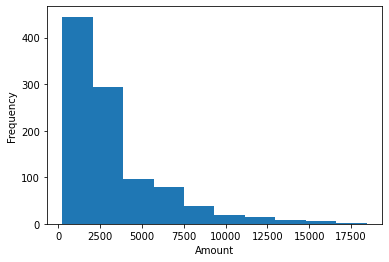

In [ ]:
# 8

# Use pandas function read_csv to load data from the file 'GermanCredit.csv' into a dataframe named 'data'.
# The file can be downloaded from the Week 4 module in Brightspace.

import pandas as pd
data = pd.read_csv('GermanCredit.csv')

# Next, write python code to draw a histogram for the variable Amount

import matplotlib.pyplot as plt

plt.hist(data['Amount'])
plt.ylabel('Frequency')
plt.xlabel('Amount')
plt.show()

In [ ]:
# 9

# Create a new variable in data named 'SqrtAmount' which is equal to the square root of Amount

import numpy as np
data['SqrtAmount'] = np.sqrt(data[['Amount']].sum(axis=1))
data.head() # To make sure the SqrtAmount column shows up

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified,SqrtAmount
0,6,1169,4,4,67,2,1,0,1,Good,...,0,1,0,1,0,0,0,1,0,34.190642
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,1,0,1,0,0,0,1,0,77.142725
2,12,2096,2,3,49,1,2,1,1,Good,...,0,1,0,1,0,0,1,0,0,45.782093
3,42,7882,2,4,45,1,2,1,1,Good,...,0,1,0,0,1,0,0,1,0,88.780629
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,1,0,0,1,0,0,1,0,69.785385


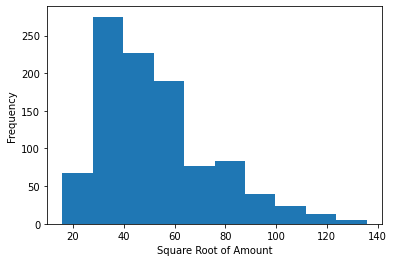

In [ ]:
# 10

# Draw a histogram for the variable SqrtAmount. Observe how this transformation
# helps offset skewness. The log() transformed may have been used for this 
# purpose also.

plt.hist(data['SqrtAmount'])
plt.ylabel('Frequency')
plt.xlabel('Square Root of Amount')
plt.show()

In [ ]:
# 11

# Run the following code to prepare data for regression models in scikit-learn by dividing 
# it into train and test data sets. This model will be used to predict the value of SqrtAmount
# based on other fields in the data set.

from sklearn.model_selection import train_test_split
y = data['SqrtAmount']
X = data.drop(columns=['SqrtAmount', 'Amount'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Next, Write code below to populate lists called str_vars and num_vars.
# The list str_vars should contain a list of column names in X which 
# are string variables (dtype = 'object'). The list num_vars should contain 
# a list of column names in data which are numeric.
# These will be used in a linear regression model to predict SqrtAmount.

# Initialize
str_vars = [] # String variables
num_vars = [] # Numeric variables

for i in X_train.columns:
    if X_train.dtypes[i] == 'object':
        str_vars.append(i)
    else:
        num_vars.append(i)


In [ ]:
# 12

# Use a column transformer to update X_train so that string variables become one-hot-encoded and
# numeric values are standardized to have a minimum value of zero and maximum value of one. Use the
# MinMaxScaler() function in scikit-learn to do this. Examine documentation if needed. After 
# transformation, X_train should be a dataframe containing the transformed data with column names 
# defined by the get_feature_names_out() function of the column transformer.

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), num_vars),
    (OneHotEncoder(sparse=False), str_vars)
)

ct.fit(X_train)
X_train = pd.DataFrame(ct.transform(X_train), columns=ct.get_feature_names_out())
X_train.head()

,minmaxscaler__Duration,minmaxscaler__InstallmentRatePercentage,minmaxscaler__ResidenceDuration,minmaxscaler__Age,minmaxscaler__NumberExistingCredits,minmaxscaler__NumberPeopleMaintenance,minmaxscaler__Telephone,minmaxscaler__ForeignWorker,minmaxscaler__CheckingAccountStatus.lt.0,minmaxscaler__CheckingAccountStatus.0.to.200,...,minmaxscaler__OtherInstallmentPlans.None,minmaxscaler__Housing.Rent,minmaxscaler__Housing.Own,minmaxscaler__Housing.ForFree,minmaxscaler__Job.UnemployedUnskilled,minmaxscaler__Job.UnskilledResident,minmaxscaler__Job.SkilledEmployee,minmaxscaler__Job.Management.SelfEmp.HighlyQualified,onehotencoder__Class_Bad,onehotencoder__Class_Good
0,0.294118,0.333333,0.666667,0.285714,0.333333,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.647059,0.000000,0.000000,0.142857,0.000000,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.117647,1.000000,0.333333,0.178571,0.333333,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.102941,0.000000,0.333333,0.375000,0.333333,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.117647,1.000000,1.000000,0.839286,0.333333,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
# 13

# Use the transformed X_train dataset with k-fold cross-validation to train a Ridge regression
# model for several values of alpha (0.001, .01, .1, 1, 10, 100). Which alpha value gives the 
# best cross-validation score?

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn import linear_model

for i in [.001, .01, .1, 1, 10, 100]:
    regr = linear_model.Ridge(alpha=i)
    
    kfold = KFold(n_splits=5)
    
    res = cross_validate(regr, X_train, y_train, cv=5, return_train_score=True)
    display(res)
    summary = cross_val_score(regr, X_train, y_train, cv=kfold)
    print("Mean cross-validation scores with alpha = {}: {:.3f}".format(i, summary.mean()))

{'fit_time': array([0.04929876, 0.02089357, 0.04828477, 0.03268623, 0.02413011]),
 'score_time': array([0.01120186, 0.01425767, 0.02953815, 0.02111173, 0.01571345]),
 'test_score': array([0.67454903, 0.5233799 , 0.63611711, 0.57644712, 0.58008547]),
 'train_score': array([0.65965166, 0.68501995, 0.6733412 , 0.6841463 , 0.68374323])}

Mean cross-validation scores with alpha = 0.001: 0.598


{'fit_time': array([0.01778173, 0.03069425, 0.02369356, 0.01154327, 0.02696633]),
 'score_time': array([0.01528239, 0.01392174, 0.01525664, 0.00648022, 0.02062488]),
 'test_score': array([0.67452058, 0.52351509, 0.63608583, 0.57650288, 0.58010603]),
 'train_score': array([0.65965153, 0.68501983, 0.67334109, 0.68414616, 0.68374309])}

Mean cross-validation scores with alpha = 0.01: 0.598


{'fit_time': array([0.02037859, 0.01383042, 0.00541425, 0.00488186, 0.00537872]),
 'score_time': array([0.00357437, 0.0034101 , 0.01161742, 0.003196  , 0.00622916]),
 'test_score': array([0.67422289, 0.52484012, 0.63576512, 0.57704364, 0.58029194]),
 'train_score': array([0.65963893, 0.68500711, 0.67332963, 0.68413303, 0.68372997])}

Mean cross-validation scores with alpha = 0.1: 0.598


{'fit_time': array([0.01782584, 0.01101613, 0.00966358, 0.01890588, 0.00639725]),
 'score_time': array([0.0031929 , 0.00346828, 0.00899625, 0.00323367, 0.01053309]),
 'test_score': array([0.6701438 , 0.53573033, 0.63189649, 0.58097404, 0.58051251]),
 'train_score': array([0.65854504, 0.68389342, 0.67232266, 0.68298319, 0.68259383])}

Mean cross-validation scores with alpha = 1: 0.600


{'fit_time': array([0.01249337, 0.02806115, 0.01241016, 0.02851129, 0.01149058]),
 'score_time': array([0.0031631 , 0.00952148, 0.00303459, 0.00550508, 0.00314093]),
 'test_score': array([0.60399654, 0.55160707, 0.57798451, 0.56528756, 0.53720304]),
 'train_score': array([0.61844131, 0.64119353, 0.63326054, 0.63902997, 0.64105164])}

Mean cross-validation scores with alpha = 10: 0.567


{'fit_time': array([0.00551176, 0.00464368, 0.01261735, 0.0116365 , 0.01151848]),
 'score_time': array([0.00708556, 0.00563669, 0.0067234 , 0.00679326, 0.01018405]),
 'test_score': array([0.36747265, 0.40333676, 0.37860304, 0.38268314, 0.34481509]),
 'train_score': array([0.42183902, 0.42132228, 0.42755223, 0.42004688, 0.43465536])}

Mean cross-validation scores with alpha = 100: 0.375


In [ ]:
# 14

# Use the transformed X_train dataset with k-fold cross-validation to train a Lasso regression
# model for several values of alpha (0.001, .01, .1, 1, 10, 100). Which alpha value gives the 
# best cross-validation score?

from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

for i in [.001, .01, .1, 1, 10, 100]:
    regr = linear_model.Lasso(alpha=i)
    
    kfold = KFold(n_splits=5)
    
    res = cross_validate(regr, X_train, y_train, cv=5, return_train_score=True)
    display(res)
    summary = cross_val_score(regr, X_train, y_train, cv=kfold)
    print("Mean cross-validation scores with alpha = {}: {:.3f}".format(i, summary.mean()))

NameError: ignored

In [ ]:
# 15 

# Using the optimal value of alpha for lasso regression found in the previous exercies,
# train the model on the entire X_train data set and test it with the X_test data set.
# Print the train and test set scores resulting from the model.

regr = linear_model.Lasso(alpha=.1)

#Now we need to train the model on the training set
regr.fit(X_train,y_train)

print("Training set score: {:.3f}".format(regr.score(X_train, y_train)))

#X_test = pd.DataFrame(imp.fit_transform(X_test), columns=imp.get_feature_names_out())
X_test = pd.DataFrame(ct.transform(X_test), columns=ct.get_feature_names_out())
print("Test set score: {:.3f}".format(regr.score(X_test, y_test)))

NameError: ignored

In [ ]:
# 16

# Inspect the coefficients of the lasso model trained in the previous step and print
# the nonzero coefficents along with the variables names to which they correspond
nonzero_coef_dict = {}
nonzero_coef_dict['const'] = regr.intercept_
k = 0
for i in regr.feature_names_in_:
    if regr.coef_[k] != 0:
        nonzero_coef_dict[i] = regr.coef_[k]
    k += 1
print(nonzero_coef_dict)


NameError: ignored

In [ ]:
# 17

# Create a scatter plot of Actual SqrtAmount versus Predicted SqrtAmount
# including both the train and test data sets. Color the points from the
# train set blue and the points from the test set red. Include a legend
# the graph.

import matplotlib.pyplot as plt

y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)
# Simple Linear Regression
plt.figure(figsize=(6,6))
plt.scatter(y_train_pred, y_train, s=8, alpha=0.5, label='train')
plt.scatter(y_test_pred, y_test, s=8, alpha=0.5, c='red', label='test')
plt.xlabel('Predicted Yield')
plt.ylabel('Actual Yield')
plt.title('Scatter Plot')
plt.legend()

NameError: ignored